## P2: Data Preprocessing and Clustering

### Part A (by Roman Formicola)


1. Group Name: Team Limburger

   Members: Roman Formicola, Paul Raymen, Andrew Peters
   
2.
a)

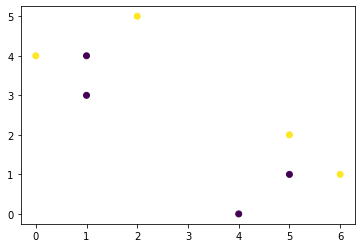

In [481]:
import matplotlib.pyplot as plt
import numpy as np
dat = np.array([ [0, 4, 2], [1, 3, 1], [1, 4, 1], [2, 5, 2], [4, 0, 1], 
       [5, 1, 1], [5, 2, 2], [6, 1, 2]  ])

#plotting the results
plt.scatter(dat[:,0], dat[:,1], c=dat[:,2])
plt.show()

b) 

In [482]:
def computeCentroids(dat):
    nG1 = 0
    g1 = [0, 0]
    nG2 = 0
    g2 = [0, 0]
    for i in range(len(dat)):
        if(dat[i][2] == 1):
            g1[0] = g1[0] + dat[i][0]
            g1[1] = g1[1] + dat[i][1]
            nG1 += 1
        if(dat[i][2] == 2):
            g2[0] = g2[0] + dat[i][0]
            g2[1] = g2[1] + dat[i][1]
            nG2 += 1
    g1[0] = g1[0] / nG1
    g1[1] = g1[1] / nG1
    g2[0] = g2[0] / nG2
    g2[1] = g2[1] / nG2
    
    return [g1, g2]

In [483]:
import pandas as pd
centroids = computeCentroids(dat)
pd.DataFrame(centroids, index=["Group 1", "Group 2"], columns=["X1", "X2"])

,X1,X2
Group 1,2.75,2.0
Group 2,3.25,3.0


In [484]:
import math
def euclidDist(point, cluster):
    return math.sqrt((point[0] - cluster[0])**2 + (point[1] - cluster[1])**2)


c)

In [485]:
def kMeans(centroids):
    
    q2C = [ [], [], [], [], [], [], [], [] ]
    for i in range(8):
        dc1 = euclidDist(dat[i][0:2], centroids[0])
        q2C[i].append(dc1)
        dc2 = euclidDist(dat[i][0:2], centroids[1])
        q2C[i].append(dc2)
        if(dc2 < dc1):
            q2C[i].append(2)
        else: 
            q2C[i].append(1)

    dt = pd.DataFrame(q2C, index=[1, 2, 3, 4, 5, 6, 7, 8], columns=["d2c1", "d2c2", "Group"])
    dt.style.set_caption("Hello world")
    display(dt)
    return q2C


In [486]:
i1 = kMeans(centroids)

,d2c1,d2c2,Group
1,3.400368,3.400368,1
2,2.015564,2.250000,1
3,2.657536,2.462214,2
4,3.092329,2.358495,2
5,2.358495,3.092329,1
6,2.462214,2.657536,1
7,2.250000,2.015564,2
8,3.400368,3.400368,1


d)

In [487]:
centroids2 = computeCentroids(i1)
display(pd.DataFrame(centroids2, index=["Group 1", "Group 2"], columns=["X1", "X2"]))
i2 = kMeans(centroids2)
centroids3 = computeCentroids(i2)
display(pd.DataFrame(centroids3, index=["Group 1", "Group 2"], columns=["X1", "X2"]))
i3 = kMeans(centroids3)

,X1,X2
Group 1,2.727402,2.960120
Group 2,2.666622,2.278758


,d2c1,d2c2,Group
1,2.918916,3.173885,1
2,1.727862,1.815990,1
3,2.016251,2.395893,1
4,2.165692,2.801703,1
5,3.222083,2.640196,2
6,3.001129,2.660804,2
7,2.467090,2.349970,2
8,3.814704,3.570243,2


,X1,X2
Group 1,2.207180,2.546868
Group 2,3.126251,2.805303


,d2c1,d2c2,Group
1,2.642582,3.346752,1
2,1.289424,2.135147,1
3,1.889147,2.438903,1
4,2.461865,2.466807,1
5,3.114601,2.938224,2
6,3.192592,2.601933,2
7,2.845858,2.039472,2
8,4.096130,3.393752,2


e)

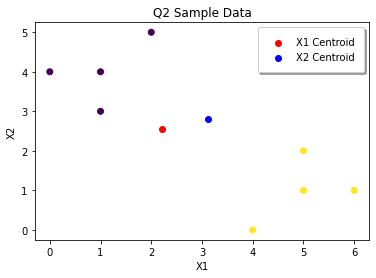

In [488]:
sI = np.array(i3)
centroids3 = np.array(centroids3)
plt.scatter(dat[:,0], dat[:,1], c=sI[:,2])

plt.scatter(centroids3[0][0], centroids3[0][1], color='r', label="X1 Centroid")
plt.scatter(centroids3[1][0], centroids3[1][1], color='b', label="X2 Centroid")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Q2 Sample Data")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

3.
a)

Step 1. Combine 2 and 5

d(b, e) = 0.2 / 2 = 0.1

In [489]:
import pandas as pd
D1 = [[0, '-', '-', '-'], 
             [0.6, 0,'-' ,'-' ], 
             [0.4, 0.5, 0, '-' ], 
             [0.7, 0.8, 0.45, 0]]
pd.DataFrame(D1, index=[1, 25, 3, 4], columns=[1, 25, 3, 4])

,1,25,3,4
1,0.0,-,-,-
25,0.6,0,-,-
3,0.4,0.5,0,-
4,0.7,0.8,0.45,0


Step 2. Combine 1 and 3

d(a, c) = 0.4 / 2 = 0.2

In [490]:
D2 = [[0, '-', '-'], 
      [0.6, 0,'-'], 
      [0.7, 0.8, 0]]
pd.DataFrame(D2, index=[13, 25, 4], columns=[13, 25, 4])

,13,25,4
13,0.0,-,-
25,0.6,0,-
4,0.7,0.8,0


Step 3. Combine 13 and 25

d(ac, be) = 0.6 / 2 = 0.3

In [491]:
D3 = [[0, '-'], 
      [0.8, 0]]
pd.DataFrame(D3, index=[1235, 4], columns=[1235, 4])

,1235,4
1235,0.0,-
4,0.8,0


Step 4. Combine 1235 and 4

d(abce, d) = 0.8 / 2 = 0.4

In [492]:
D4 = [[0]]
pd.DataFrame(D4, index=[12345], columns=[12345])

,12345
12345,0


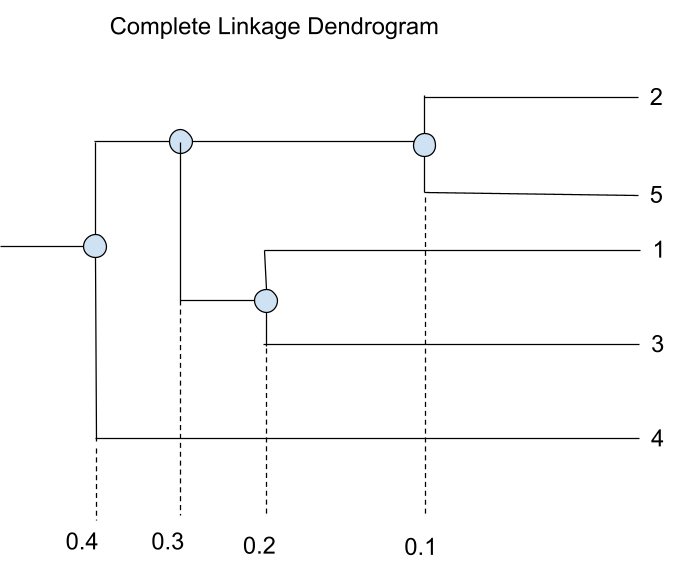

In [493]:
from IPython.display import Image

fig = Image(filename=('Comp-Link-Dendrogram.png'))
fig

b)
Step 1: Combine 2 and 5:

d(b, e) = 0.2 / 1 = 0.1

In [494]:
import pandas as pd
bD1 = [[0, '-', '-', '-'], 
      [0.3, 0,'-' ,'-' ], 
      [0.4, 0.4, 0, '-' ], 
      [0.7, 0.35, 0.45, 0]]
pd.DataFrame(bD1, index=[1, 25, 3, 4], columns=[1, 25, 3, 4])

,1,25,3,4
1,0.0,-,-,-
25,0.3,0,-,-
3,0.4,0.4,0,-
4,0.7,0.35,0.45,0


Step 2: Combine 1 and 25

d(a, be) = 0.3 / 2 = 0.15

In [495]:
bD2 = [[0, '-', '-'], 
      [0.4, 0,'-'], 
      [0.35, 0.45, 0]]
pd.DataFrame(bD2, index=[125, 3, 4], columns=[125, 3, 4])

,125,3,4
125,0.00,-,-
3,0.40,0,-
4,0.35,0.45,0


Step 3: Combine 125 and 4

d(abe, d) = 0.35 / 2 = 0.175

In [496]:
bD3 = [[0, '-'], 
      [0.4, 0]]
pd.DataFrame(bD3, index=[1245, 3], columns=[1245, 3])

,1245,3
1245,0.0,-
3,0.4,0


Step 4: Combine 1245 and 3

d(abde, 3) = 0.4 / 2 = 0.2

In [497]:
bD4 = [[0]]
pd.DataFrame(bD4, index=[12345], columns=[12345])

,12345
12345,0


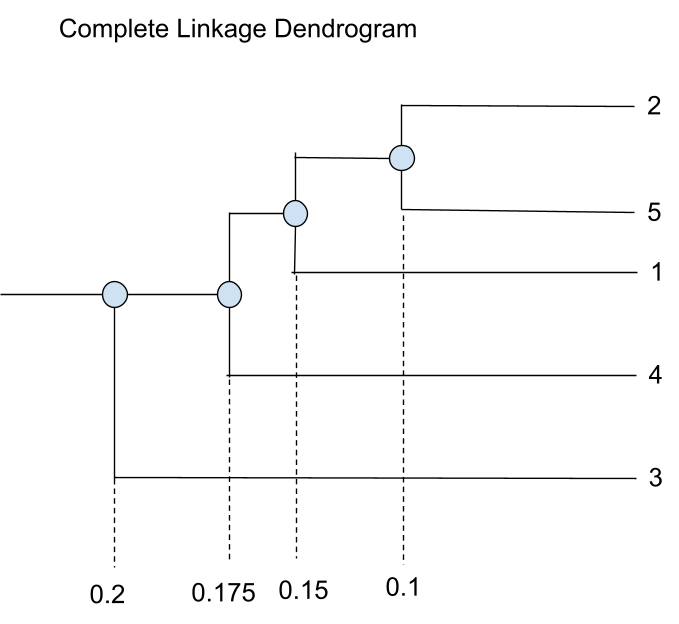

In [498]:
fig2 = Image(filename=('Single-Link-Dendrogram.png'))
fig2

c) For Complete Linkage Clustering with k = 3, Clusters are {2, 5}, {1,3}, {4}

For Single Linkage Clustering with k = 3, Clusters are {3}, {4}, {2, 5, 1}